# NOT WORKING YET

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

csv_folder = "../csv/"
csv_name = "viagem"

dataframe = pd.read_csv(csv_folder+csv_name+".csv")

In [10]:
def divided_differences(x, y):
    n = len(x)
    # Create a 2D array to hold the divided differences
    table = np.zeros((n, n))
    # The first column is y values
    table[:, 0] = y

    # Fill in the table
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])
    
    return table

def evaluate_newton_polynomial(x, y, value, table):
    table = divided_differences(x, y)
    n = len(x)
    
    # Coefficients of the polynomial are the first element in each column of the table
    coeffs = table[0, :]
    
    # Evaluate the polynomial at 'value'
    result = coeffs[0]
    product = 1.0
    for i in range(1, n):
        product *= (value - x[i - 1])
        result += coeffs[i] * product
    
    return result

In [11]:
print(dataframe.columns.to_list())

column_x = "tempo"
column_y = "distancia"

['tempo', 'distancia']


In [12]:
print(dataframe)

# lista de elementos X
list_x = dataframe[column_x].to_list()
# lista de elementos Y
list_y = dataframe[column_y].to_list()

   tempo  distancia
0      1          7
1      3         21
2      5         41
3     10         75


In [16]:
table = divided_differences(list_x, list_y)

# ESCOLHA UM VALOR A SER INTERPOLADO
value = 0

print(f"Valor Interpolado de X = {value} => Y = {evaluate_newton_polynomial(list_x, list_y, value, table)}")

Valor Interpolado de X = 0 => Y = 4.261904761904763


<Axes: >

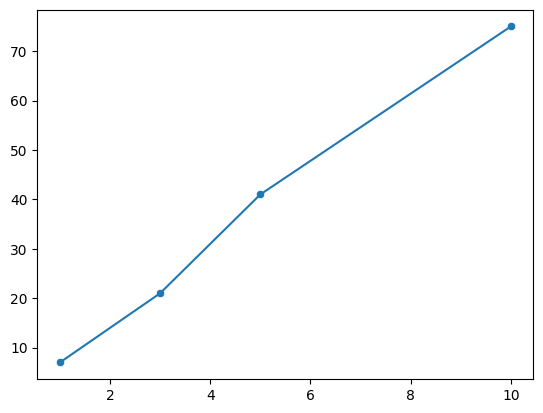

In [14]:
# Interpolandoooo todos os valores
table = divided_differences(list_x, list_y)
interpolated_y_list = []
for value in list_x:
    interpolated_value = evaluate_newton_polynomial(list_x, list_y, value,table)
    interpolated_y_list.append(interpolated_value)

# Visualizando o gráfico com os dados atuais e os dados Interpolados pela Formula
sns.scatterplot(x=list_x, y=list_y)
# sns.lineplot(x=list_x, y=list_y)

# sns.scatterplot(x=list_x, y=interpolated_y_list)
sns.lineplot(x=list_x, y=interpolated_y_list)

<Axes: >

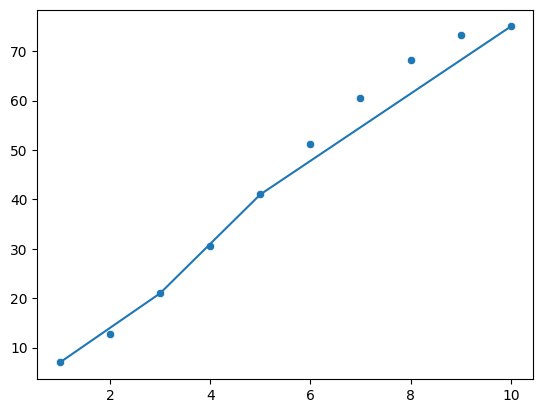

In [15]:
# sns.scatterplot(x=list_x, y=list_y)
sns.lineplot(x=list_x, y=list_y)


interpolated_list = []

for i in range(list_x[0],list_x[-1] + 1):
    p = evaluate_newton_polynomial(list_x, list_y, i, table)
    interpolated_list.append(p) 
    
sns.scatterplot(x=range(list_x[0],list_x[-1] + 1), y=interpolated_list)
# sns.lineplot(x=range(list_x[-1] + 1), y=interpolated_list)